# DATA PRE-PROCESSING AND EXPLORATION NOTEBOOK

### **I. Import thư viện và tải dữ liệu**

**Import thư viện**

In [499]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

**Cấu hình**

In [500]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

**Lấy dữ liệu từ file**

In [501]:
df = pd.read_csv('football_players_dataset.csv')

print(f"Load dữ liệu thành công!")
print(f"Kích thước dữ liệu: {df.shape[0]:,} dòng x {df.shape[1]} cột")

Load dữ liệu thành công!
Kích thước dữ liệu: 9,680 dòng x 70 cột


### **2. Ý nghĩa từng cột dữ liệu**

In [502]:
column_descriptions = {
    # ===== THÔNG TIN CƠ BẢN =====
    'player_id': 'ID duy nhất của cầu thủ',
    'player_name': 'Tên cầu thủ',
    'age': 'Tuổi của cầu thủ (năm)',
    'nationality': 'Quốc tịch của cầu thủ',
    'height': 'Chiều cao của cầu thủ (cm)',
    'foot': 'Chân thuận (Left/Right/Both)',
    'position': 'Vị trí thi đấu chính',
    'current_club': 'Câu lạc bộ hiện tại',
    'league': 'Giải đấu hiện tại',

    # ===== THỜI GIAN THI ĐẤU =====
    'minutes_played': 'Tổng số phút thi đấu',
    'minutes_per_game': 'Số phút thi đấu trung bình mỗi trận',

    # ===== CHỈ SỐ TẤN CÔNG =====
    'goals': 'Tổng số bàn thắng',
    'assists': 'Tổng số kiến tạo',
    'goals_per_90': 'Số bàn thắng trung bình mỗi 90 phút',
    'assists_per_90': 'Số kiến tạo trung bình mỗi 90 phút',
    'npg_per90': 'Số bàn thắng không tính penalty mỗi 90 phút',
    'npxg_per90': 'Chỉ số xG không tính penalty mỗi 90 phút',
    'xag_per90': 'Chỉ số kiến tạo kỳ vọng (xAG) mỗi 90 phút',
    'npxg_xag_per90': 'Tổng npxG + xAG mỗi 90 phút',
    'xg_per90': 'Chỉ số bàn thắng kỳ vọng (xG) mỗi 90 phút',
    'shots_per90': 'Số cú sút trung bình mỗi 90 phút',
    'shots_on_target_per90': 'Số cú sút trúng đích mỗi 90 phút',
    'shots_on_target_pct': 'Tỷ lệ sút trúng đích (%)',
    'avg_shot_distance': 'Khoảng cách sút trung bình (m)',
    'sca_per90': 'Số hành động tạo cơ hội dứt điểm mỗi 90 phút',
    'gca_per90': 'Số hành động tạo bàn thắng mỗi 90 phút',

    # ===== CHỈ SỐ CHUYỀN BÓNG – KIẾN TẠO =====
    'key_passes_per90': 'Số đường chuyền tạo cơ hội mỗi 90 phút',
    'passes_completed_per90': 'Số đường chuyền chính xác mỗi 90 phút',
    'pass_completion_pct': 'Tỷ lệ chuyền bóng chính xác (%)',
    'passes_into_final_third_per90': 'Số đường chuyền vào 1/3 cuối sân mỗi 90 phút',
    'passes_into_penalty_area_per90': 'Số đường chuyền vào vòng cấm mỗi 90 phút',
    'progressive_passes_per90': 'Số đường chuyền tịnh tiến mỗi 90 phút',
    'progressive_passes_rec_per90': 'Số lần nhận bóng tịnh tiến mỗi 90 phút',
    'progressive_carries_per90': 'Số lần dẫn bóng tịnh tiến mỗi 90 phút',

    # ===== CHỈ SỐ TRIỂN KHAI BÓNG – RÊ DẮT =====
    'take_ons_per90': 'Số lần rê bóng qua người mỗi 90 phút',
    'take_on_success_pct': 'Tỷ lệ rê bóng thành công (%)',
    'carries_per90': 'Số lần dẫn bóng mỗi 90 phút',
    'carries_into_final_third_per90': 'Số lần dẫn bóng vào 1/3 cuối sân mỗi 90 phút',
    'touches_per90': 'Số lần chạm bóng mỗi 90 phút',
    'touches_att_third_per90': 'Số lần chạm bóng ở 1/3 tấn công mỗi 90 phút',
    'touches_att_pen_per90': 'Số lần chạm bóng trong vòng cấm đối phương mỗi 90 phút',
    'passes_received_per90': 'Số lần nhận đường chuyền mỗi 90 phút',

    # ===== CHỈ SỐ PHÒNG NGỰ =====
    'tackles_per90': 'Số pha tắc bóng mỗi 90 phút',
    'interceptions_per90': 'Số pha cắt bóng mỗi 90 phút',
    'blocks_per90': 'Số pha chắn bóng mỗi 90 phút',
    'ball_recoveries_per90': 'Số lần thu hồi bóng mỗi 90 phút',

    # ===== CHỈ SỐ KHÔNG CHIẾN – THỂ CHẤT =====
    'aerials_won_per90': 'Số pha không chiến thắng mỗi 90 phút',
    'aerial_win_pct': 'Tỷ lệ không chiến thắng (%)',

    # ===== CHỈ SỐ KỶ LUẬT =====
    'yellow_cards_per90': 'Số thẻ vàng mỗi 90 phút',
    'red_cards_per90': 'Số thẻ đỏ mỗi 90 phút',
    'fouls_committed_per90': 'Số lần phạm lỗi mỗi 90 phút',

    # ===== CHỈ SỐ THỦ MÔN – CẢN PHÁ =====
    'goals_against_per90': 'Số bàn thua trung bình mỗi 90 phút',
    'shots_on_target_against_per90': 'Số cú sút trúng đích phải nhận mỗi 90 phút',
    'saves_per90': 'Số pha cứu thua mỗi 90 phút',
    'save_percentage': 'Tỷ lệ cứu thua (%)',
    'clean_sheet_pct': 'Tỷ lệ giữ sạch lưới (%)',
    'psxg_per_shot': 'Chỉ số PSxG trung bình mỗi cú sút phải nhận',
    'psxg_ga_per90': 'PSxG trừ bàn thua mỗi 90 phút',
    'penalty_save_pct': 'Tỷ lệ cản phá penalty (%)',

    # ===== CHỈ SỐ THỦ MÔN – PHÁT BÓNG & CHUYỀN BÓNG =====
    'passes_attempted_per90': 'Số đường chuyền thực hiện mỗi 90 phút',
    'launch_pct': 'Tỷ lệ phát bóng dài (%)',
    'avg_pass_length': 'Độ dài đường chuyền trung bình (m)',

    # ===== CHỈ SỐ THỦ MÔN – QUÉT BÓNG =====
    'def_actions_outside_pen_per90': 'Số pha phòng ngự ngoài vòng cấm mỗi 90 phút',
    'avg_distance_def_actions': 'Khoảng cách trung bình của các pha phòng ngự (m)',

    # ===== CHỈ SỐ THỦ MÔN – CHỐNG BÓNG BỔNG =====
    'crosses_stopped_pct': 'Tỷ lệ cản phá bóng bổng từ tạt cánh (%)',

    # ===== CHỈ SỐ KẾT QUẢ TRẬN ĐẤU =====
    'wins_per90': 'Số trận thắng trung bình mỗi 90 phút',
    'draws_per90': 'Số trận hòa trung bình mỗi 90 phút',
    'losses_per90': 'Số trận thua trung bình mỗi 90 phút',

    # ===== GIÁ TRỊ THỊ TRƯỜNG (TARGET) =====
    'market_value': 'Giá trị thị trường ước tính của cầu thủ (EUR)'
}


In [503]:
description_df = pd.DataFrame({
    'Column': list(column_descriptions.keys()),
    'Description': list(column_descriptions.values()),
    'Data_Type': [str(df[col].dtype) if col in df.columns else 'N/A' 
                  for col in column_descriptions.keys()],
    'Non_Null_Count': [df[col].count() if col in df.columns else 0
                       for col in column_descriptions.keys()]
})

print("="*100)
print(" "*50 + "BẢNG MÔ TẢ DỮ LIỆU")
print("="*100)
print(description_df.to_string(index=False))
print("="*100)
print("\n'market_value' là biến mục tiêu (target variable) cần dự đoán!")

                                                  BẢNG MÔ TẢ DỮ LIỆU
                        Column                                            Description Data_Type  Non_Null_Count
                     player_id                                ID duy nhất của cầu thủ    object            9680
                   player_name                                            Tên cầu thủ    object            9680
                           age                                 Tuổi của cầu thủ (năm)   float64            9680
                   nationality                                  Quốc tịch của cầu thủ    object            9666
                        height                             Chiều cao của cầu thủ (cm)   float64            9680
                          foot                           Chân thuận (Left/Right/Both)    object            6802
                      position                                   Vị trí thi đấu chính    object            9680
                  current_club     

**Tổng quan dữ liệu**

Bộ dữ liệu gồm **4 nhóm đặc trưng chính**:

- **Thông tin cơ bản**: Đặc điểm cá nhân và bối cảnh thi đấu của cầu thủ (tuổi, quốc tịch, chiều cao, vị trí, CLB, giải đấu…).
- **Chỉ số tấn công**: Đánh giá khả năng ghi bàn và kiến tạo (goals, assists, xG, xAG, shots, SCA, GCA…).
- **Chỉ số phòng ngự**: Đánh giá khả năng tranh chấp và phòng thủ (tackles, interceptions, blocks, ball recoveries…).
- **Chỉ số thủ môn**: Chỉ áp dụng cho vị trí thủ môn (saves, clean sheets, PSxG, goals against…).

Biến **`market_value`** là **biến mục tiêu (target)**, được dùng để **dự đoán giá trị thị trường của cầu thủ dựa trên các đặc trưng còn lại**.


### **3. Kiểm tra kiểu dữ liệu**

**3.1. Tổng quan về kiểu dữ liệu**

In [504]:
print(f"\nKÍCH THƯỚC DỮ LIỆU:")
print(f"   - Số dòng (cầu thủ): {len(df):,}")
print(f"   - Số cột (features): {len(df.columns)}")
print(f"   - Tổng số cells: {len(df) * len(df.columns):,}")

print(f"\nPHÂN LOẠI KIỂU DỮ LIỆU:")
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"   - {dtype}: {count} cột")


KÍCH THƯỚC DỮ LIỆU:
   - Số dòng (cầu thủ): 9,680
   - Số cột (features): 70
   - Tổng số cells: 677,600

PHÂN LOẠI KIỂU DỮ LIỆU:
   - float64: 59 cột
   - object: 7 cột
   - int64: 4 cột


**3.2. Chi tiết kiểu dữ liệu của từng cột**

In [505]:
dtype_df = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes,
    'Non_Null': df.count(),
    'Null_Count': df.isnull().sum(),
    'Sample_Value': [df[col].iloc[0] if len(df[col]) > 0 else None for col in df.columns]
})

print(dtype_df.to_string(index=False))

                        Column Data_Type  Non_Null  Null_Count         Sample_Value
                     player_id    object      9680           0 guillermo-may-fde378
                   player_name    object      9680           0        Guillermo May
                           age   float64      9680           0                 27.0
                   nationality    object      9666          14              Uruguay
                        height   float64      9680           0                178.0
                          foot    object      6802        2878                  NaN
                      position    object      9680           0                   FW
                  current_club    object      9680           0          Auckland FC
                        league    object      9680           0         A-League Men
                   appearances     int64      9680           0                   26
                minutes_played     int64      9680           0              

**3.3. Kiểm tra các vấn đề về kiểu dữ liệu**

In [506]:
issues_found = []

Kiểm tra các cột số có chứa giá trị không hợp lệ

In [507]:
non_negative_cols = [
    'age', 'height', 'market_value', 'appearances',
    'minutes_played', 'minutes_per_game',

    # Tấn công
    'goals', 'assists',
    'goals_per_90', 'assists_per_90',
    'npg_per90', 'npxg_per90', 'xag_per90',
    'npxg_xag_per90', 'xg_per90',
    'shots_per90', 'shots_on_target_per90',
    'avg_shot_distance', 'sca_per90', 'gca_per90',

    # Chuyền & kiến tạo
    'key_passes_per90', 'passes_completed_per90',
    'passes_into_final_third_per90',
    'passes_into_penalty_area_per90',
    'progressive_passes_per90',
    'progressive_passes_rec_per90',

    # Dẫn bóng
    'progressive_carries_per90',
    'take_ons_per90',
    'carries_per90',
    'carries_into_final_third_per90',

    # Chạm bóng
    'touches_per90',
    'touches_att_third_per90',
    'touches_att_pen_per90',
    'passes_received_per90',

    # Phòng ngự
    'tackles_per90', 'interceptions_per90',
    'blocks_per90', 'ball_recoveries_per90',
    'aerials_won_per90',

    # Kỷ luật
    'yellow_cards_per90', 'red_cards_per90',
    'fouls_committed_per90',

    # Thủ môn
    'goals_against_per90',
    'shots_on_target_against_per90',
    'saves_per90',
    'psxg_per_shot',
    'passes_attempted_per90',
    'avg_pass_length',
    'def_actions_outside_pen_per90',
    'avg_distance_def_actions',

    # Kết quả
    'wins_per90', 'draws_per90', 'losses_per90'
]


invalid_cols = []

for col in non_negative_cols:
    if col in df.columns:
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            invalid_cols.append(f"{col} ({negative_count})")

if invalid_cols:
    result = "- Các cột có giá trị âm: " + ", ".join(invalid_cols)
    print(result)
    issues_found.append(result)
else:
    result = "Tất cả các cột non-negative đều hợp lệ"
    print(result)


Tất cả các cột non-negative đều hợp lệ


Kiểm tra tỷ lệ % (phải từ 0-100)

In [508]:
percentage_cols = [
    'shots_on_target_pct', 'pass_completion_pct', 'take_on_success_pct',
    'aerial_win_pct', 'save_percentage', 'clean_sheet_pct',
    'penalty_save_pct', 'launch_pct', 'crosses_stopped_pct'
]

pct_issues = {}

for col in percentage_cols:
    if col in df.columns:
        invalid = ((df[col] < 0) | (df[col] > 100)).sum()
        if invalid > 0:
            min_val = df[col].min()
            max_val = df[col].max()
            pct_issues[col] = {'count': invalid, 'min': min_val, 'max': max_val}

if pct_issues:
    print("CÁC CỘT PHẦN TRĂM KHÔNG HỢP LỆ (phải từ 0-100%):\n")
    for col, info in pct_issues.items():
        print(f"  - {col}: {info['count']} giá trị ngoài khoảng [min={info['min']:.2f}, max={info['max']:.2f}]")
else:
    print("Tất cả các cột phần trăm đều hợp lệ (0-100%)")



Tất cả các cột phần trăm đều hợp lệ (0-100%)


Kiểm tra logic nghiệp vụ

In [509]:
logic_issues = []
# 1. Tuổi hợp lý (15-45 tuổi)
if 'age' in df.columns:
    invalid_age = ((df['age'] < 15) | (df['age'] > 45)).sum()
    if invalid_age > 0:
        logic_issues.append(f"Tuổi không hợp lý: {invalid_age} cầu thủ (< 15 hoặc > 45 tuổi)")

# 2. Chiều cao hợp lý (150-220 cm)
if 'height' in df.columns:
    invalid_height = ((df['height'] < 150) | (df['height'] > 220)).sum()
    if invalid_height > 0:
        logic_issues.append(f"Chiều cao không hợp lý: {invalid_height} cầu thủ (< 150 hoặc > 220 cm)")

# 3. Số bàn thắng ≤ số cú sút
if all(col in df.columns for col in ['goals', 'shots_per90', 'minutes_played']):
    df['total_shots'] = df['shots_per90'] * df['minutes_played'] / 90
    invalid_goals = (df['goals'] > df['total_shots']).sum()
    if invalid_goals > 0:
        logic_issues.append(f"Bàn thắng > số cú sút: {invalid_goals} cầu thủ")

# 4. Số cú sút trúng đích ≤ tổng số cú sút
if all(col in df.columns for col in ['shots_on_target_per90', 'shots_per90']):
    invalid_shots = (df['shots_on_target_per90'] > df['shots_per90']).sum()
    if invalid_shots > 0:
        logic_issues.append(f"Sút trúng đích > tổng số sút: {invalid_shots} cầu thủ")

# 5. Minutes per game ≤ 90 phút
if 'minutes_per_game' in df.columns:
    invalid_minutes = (df['minutes_per_game'] > 135).sum()  
    if invalid_minutes > 0:
        logic_issues.append(f"Phút thi đấu/trận > 135 phút: {invalid_minutes} cầu thủ")

# 6. Tổng wins + draws + losses = 1 (per 90)
if all(col in df.columns for col in ['wins_per90', 'draws_per90', 'losses_per90']):
    df['total_results'] = df['wins_per90'] + df['draws_per90'] + df['losses_per90']
    invalid_results = (abs(df['total_results'] - 1.0) > 0.01).sum()
    if invalid_results > 0:
        logic_issues.append(f"Tổng kết quả trận đấu ≠ 1: {invalid_results} cầu thủ")

if logic_issues:
    print("CÁC VẤN ĐỀ LOGIC NGHIỆP VỤ:\n")
    for issue in logic_issues:
        print(f"  - {issue}")
else:
    print("Tất cả các ràng buộc logic đều hợp lệ")


Tất cả các ràng buộc logic đều hợp lệ


Tổng kết

In [522]:
if len(issues_found) + len(logic_issues) > 0:
    print(f"- PHÁT HIỆN {len(issues_found) + len(logic_issues)} VẤN ĐỀ CẦN XỬ LÝ!")
    print("\nCác vấn đề này sẽ được xử lý trong phần Data Preprocessing.")
else:
    print("KHÔNG CÓ VẤN ĐỀ VỀ KIỂU DỮ LIỆU!")

df = df.drop(columns=["total_shots", "total_results"])

KHÔNG CÓ VẤN ĐỀ VỀ KIỂU DỮ LIỆU!


### **4. Phân tích Missing Values (Dữ liệu thiếu)**


CÁC CỘT CÓ MISSING VALUES:

                        Column  Missing_Count  Missing_Percentage Data_Type
                  losses_per90           9325               96.33   float64
        passes_attempted_per90           9325               96.33   float64
           goals_against_per90           9325               96.33   float64
 shots_on_target_against_per90           9325               96.33   float64
                   saves_per90           9325               96.33   float64
               save_percentage           9325               96.33   float64
                 psxg_per_shot           9325               96.33   float64
                 psxg_ga_per90           9325               96.33   float64
              penalty_save_pct           9325               96.33   float64
               clean_sheet_pct           9325               96.33   float64
                    launch_pct           9325               96.33   float64
 def_actions_outside_pen_per90           9325              

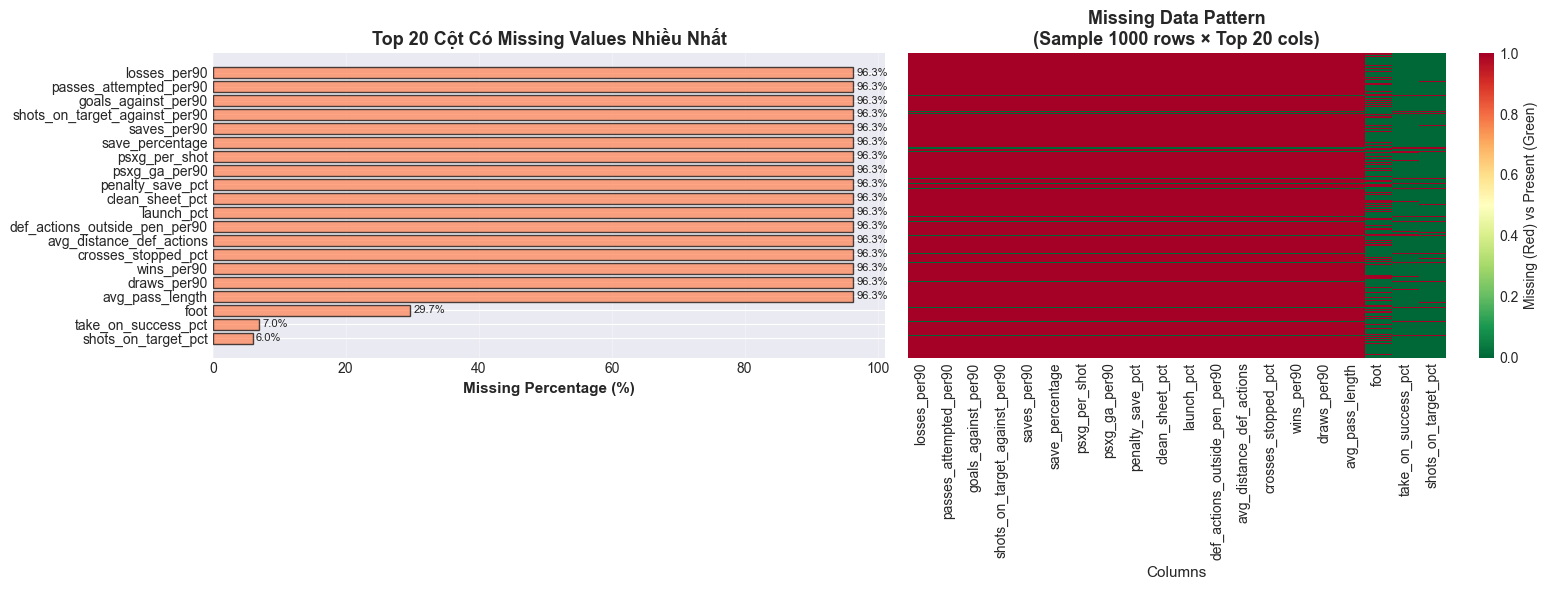


PHÂN TÍCH NGUYÊN NHÂN MISSING VALUES

[1] CHỈ SỐ THỦ MÔN (14 cột - ~96.3% missing):
    Các cột: goals_against_per90, shots_on_target_against_per90, saves_per90, save_percentage, clean_sheet_pct...
    ├─ Nguyên nhân: Chỉ áp dụng cho vị trí Goalkeeper
    ├─ Đặc điểm: Các vị trí khác (DF, MF, FW) không có dữ liệu
    └─ Giải pháp: 
       • Tùy vị trí sẽ sử dụng các cột khác nhau để dự đoán market_value

[2] CHỈ SỐ TẤN CÔNG NÂNG CAO (12 cột - ~4.1% missing):
    Các cột: npg_per90, npxg_per90, xag_per90, npxg_xag_per90, xg_per90...
    ├─ Nguyên nhân: Cầu thủ ít tấn công hoặc không có dữ liệu xG
    ├─ Đặc điểm: Thường là hậu vệ, thủ môn hoặc cầu thủ dự bị
    └─ Giải pháp: 
       • Điền 0 (không có hoạt động tấn công)
       • Xem xét loại bỏ nếu minutes_played < ngưỡng tối thiểu

[3] CHỈ SỐ CHUYỀN BÓNG (7 cột - ~3.7% missing):
    Các cột: passes_completed_per90, pass_completion_pct, passes_into_final_third_per90, passes_into_penalty_area_per90, progressive_passes_per90, progressiv

In [524]:
# Tính toán missing values
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
    'Data_Type': df.dtypes
}).reset_index(drop=True)

# Lọc các cột có missing values
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
)

if len(missing_df) > 0:
    print("\nCÁC CỘT CÓ MISSING VALUES:\n")
    print(missing_df.to_string(index=False))
    print(f"\n- Tổng số cột có missing: {len(missing_df)}/{len(df.columns)}")
    print(f"- Tổng số cells missing: {missing_df['Missing_Count'].sum():,}/{df.size:,}")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    top_missing = missing_df.head(20)  
    axes[0].barh(range(len(top_missing)), top_missing['Missing_Percentage'], 
                 color='coral', alpha=0.7, edgecolor='black')
    axes[0].set_yticks(range(len(top_missing)))
    axes[0].set_yticklabels(top_missing['Column'])
    axes[0].set_xlabel('Missing Percentage (%)', fontsize=11, fontweight='bold')
    axes[0].set_title('Top 20 Cột Có Missing Values Nhiều Nhất', 
                     fontsize=13, fontweight='bold')
    axes[0].grid(alpha=0.3, axis='x')
    axes[0].invert_yaxis()

    for i, v in enumerate(top_missing['Missing_Percentage']):
        axes[0].text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=8)

    sample_size = min(1000, len(df))
    missing_cols = missing_df['Column'].tolist()[:20] 
    
    if missing_cols:
        sample_data = df[missing_cols].sample(sample_size, random_state=42)
        sns.heatmap(sample_data.isnull(), 
                   cbar=True, 
                   yticklabels=False, 
                   cmap='RdYlGn_r',
                   cbar_kws={'label': 'Missing (Red) vs Present (Green)'},
                   ax=axes[1])
        axes[1].set_title(f'Missing Data Pattern\n(Sample {sample_size} rows × Top 20 cols)', 
                         fontsize=13, fontweight='bold')
        axes[1].set_xlabel('Columns', fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    print("\nPHÂN TÍCH NGUYÊN NHÂN MISSING VALUES\n")
    
    missing_cols = missing_df['Column'].tolist()
    
    # 1. Goalkeeper-specific stats
    gk_stats = [
        'goals_against_per90', 'shots_on_target_against_per90', 
        'saves_per90', 'save_percentage', 'clean_sheet_pct',
        'psxg_per_shot', 'psxg_ga_per90', 'penalty_save_pct',
        'passes_attempted_per90', 'launch_pct', 'avg_pass_length',
        'def_actions_outside_pen_per90', 'avg_distance_def_actions',
        'crosses_stopped_pct'
    ]
    gk_missing = [col for col in gk_stats if col in missing_cols]
    
    if gk_missing:
        gk_count = sum(missing_df[missing_df['Column'].isin(gk_missing)]['Missing_Count'])
        gk_pct = missing_df[missing_df['Column'].isin(gk_missing)]['Missing_Percentage'].mean()
        print(f"[1] CHỈ SỐ THỦ MÔN ({len(gk_missing)} cột - ~{gk_pct:.1f}% missing):")
        print(f"    Các cột: {', '.join(gk_missing[:5])}{'...' if len(gk_missing) > 5 else ''}")
        print(f"    ├─ Nguyên nhân: Chỉ áp dụng cho vị trí Goalkeeper")
        print(f"    ├─ Đặc điểm: Các vị trí khác (DF, MF, FW) không có dữ liệu")
        print(f"    └─ Giải pháp: ")
        print(f"       • Tùy vị trí sẽ sử dụng các cột khác nhau để dự đoán market_value")
    
    # 2. Advanced attacking metrics
    attack_stats = [
        'npg_per90', 'npxg_per90', 'xag_per90', 'npxg_xag_per90', 'xg_per90',
        'sca_per90', 'gca_per90', 'key_passes_per90',
        'shots_per90', 'shots_on_target_per90', 'shots_on_target_pct', 'avg_shot_distance'
    ]
    attack_missing = [col for col in attack_stats if col in missing_cols]
    
    if attack_missing:
        attack_pct = missing_df[missing_df['Column'].isin(attack_missing)]['Missing_Percentage'].mean()
        print(f"\n[2] CHỈ SỐ TẤN CÔNG NÂNG CAO ({len(attack_missing)} cột - ~{attack_pct:.1f}% missing):")
        print(f"    Các cột: {', '.join(attack_missing[:5])}{'...' if len(attack_missing) > 5 else ''}")
        print(f"    ├─ Nguyên nhân: Cầu thủ ít tấn công hoặc không có dữ liệu xG")
        print(f"    ├─ Đặc điểm: Thường là hậu vệ, thủ môn hoặc cầu thủ dự bị")
        print(f"    └─ Giải pháp: ")
        print(f"       • Điền 0 (không có hoạt động tấn công)")
        print(f"       • Xem xét loại bỏ nếu minutes_played < ngưỡng tối thiểu")
    
    # 3. Passing & progressive stats
    passing_stats = [
        'passes_completed_per90', 'pass_completion_pct',
        'passes_into_final_third_per90', 'passes_into_penalty_area_per90',
        'progressive_passes_per90', 'progressive_passes_rec_per90', 'progressive_carries_per90'
    ]
    passing_missing = [col for col in passing_stats if col in missing_cols]
    
    if passing_missing:
        passing_pct = missing_df[missing_df['Column'].isin(passing_missing)]['Missing_Percentage'].mean()
        print(f"\n[3] CHỈ SỐ CHUYỀN BÓNG ({len(passing_missing)} cột - ~{passing_pct:.1f}% missing):")
        print(f"    Các cột: {', '.join(passing_missing)}")
        print(f"    ├─ Nguyên nhân: Thiếu dữ liệu chi tiết về chuyền bóng")
        print(f"    └─ Giải pháp: Điền 0 hoặc median theo vị trí")
    
    # 4. Dribbling & ball carrying
    dribbling_stats = [
        'take_ons_per90', 'take_on_success_pct',
        'carries_per90', 'carries_into_final_third_per90',
        'touches_per90', 'touches_att_third_per90', 'touches_att_pen_per90',
        'passes_received_per90'
    ]
    dribbling_missing = [col for col in dribbling_stats if col in missing_cols]
    
    if dribbling_missing:
        dribbling_pct = missing_df[missing_df['Column'].isin(dribbling_missing)]['Missing_Percentage'].mean()
        print(f"\n[4] CHỈ SỐ RÊ BÓNG & DỊCH CHUYỂN ({len(dribbling_missing)} cột - ~{dribbling_pct:.1f}% missing):")
        print(f"    Các cột: {', '.join(dribbling_missing[:5])}{'...' if len(dribbling_missing) > 5 else ''}")
        print(f"    ├─ Nguyên nhân: Thiếu dữ liệu chi tiết hoặc cầu thủ ít di chuyển")
        print(f"    └─ Giải pháp: Điền 0 hoặc median theo vị trí")
    
    # 5. Defensive stats
    defensive_stats = [
        'tackles_per90', 'interceptions_per90', 'blocks_per90', 
        'ball_recoveries_per90', 'aerials_won_per90', 'aerial_win_pct'
    ]
    defensive_missing = [col for col in defensive_stats if col in missing_cols]
    
    if defensive_missing:
        defensive_pct = missing_df[missing_df['Column'].isin(defensive_missing)]['Missing_Percentage'].mean()
        print(f"\n[5] CHỈ SỐ PHÒNG NGỰ ({len(defensive_missing)} cột - ~{defensive_pct:.1f}% missing):")
        print(f"    Các cột: {', '.join(defensive_missing)}")
        print(f"    ├─ Nguyên nhân: Thiếu dữ liệu hoặc cầu thủ ít phòng ngự")
        print(f"    ├─ Đặc điểm: Thường là tiền đạo có ít hoạt động phòng ngự")
        print(f"    └─ Giải pháp: Điền 0 cho các cầu thủ tấn công")
    
    # 6. Discipline stats
    discipline_stats = [
        'yellow_cards_per90', 'red_cards_per90', 'fouls_committed_per90'
    ]
    discipline_missing = [col for col in discipline_stats if col in missing_cols]
    
    if discipline_missing:
        discipline_pct = missing_df[missing_df['Column'].isin(discipline_missing)]['Missing_Percentage'].mean()
        print(f"\n[6] CHỈ SỐ KỶ LUẬT ({len(discipline_missing)} cột - ~{discipline_pct:.1f}% missing):")
        print(f"    Các cột: {', '.join(discipline_missing)}")
        print(f"    ├─ Nguyên nhân: Cầu thủ không bị phạt")
        print(f"    └─ Giải pháp: Điền 0 (không có thẻ phạt)")
    
    # 7. Match results
    results_stats = ['wins_per90', 'draws_per90', 'losses_per90']
    results_missing = [col for col in results_stats if col in missing_cols]
    
    if results_missing:
        results_pct = missing_df[missing_df['Column'].isin(results_missing)]['Missing_Percentage'].mean()
        print(f"\n[7] KẾT QUẢ TRẬN ĐẤU ({len(results_missing)} cột - ~{results_pct:.1f}% missing):")
        print(f"    Các cột: {', '.join(results_missing)}")
        print(f"    ├─ Nguyên nhân: Thiếu dữ liệu kết quả trận")
        print(f"    └─ Giải pháp: Điền giá trị mặc định hoặc loại bỏ")
    
    # 8. Basic information
    basic_info = ['age', 'height', 'nationality', 'foot', 'position', 'current_club', 'league']
    basic_missing = [col for col in basic_info if col in missing_cols]
    
    if basic_missing:
        basic_pct = missing_df[missing_df['Column'].isin(basic_missing)]['Missing_Percentage'].mean()
        print(f"\n[8] THÔNG TIN CƠ BẢN ({len(basic_missing)} cột - ~{basic_pct:.1f}% missing):")
        print(f"    Các cột: {', '.join(basic_missing)}")
        print(f"    ├─ Nguyên nhân: Dữ liệu thu thập không đầy đủ")
        print(f"    ├─ Đặc điểm: Thường là cầu thủ ít tên tuổi")
        print(f"    └─ Giải pháp: ")
        print(f"       • Numeric (age, height): Điền median/mean theo vị trí")
        print(f"       • Categorical (nationality, foot, position): Điền mode hoặc 'Unknown'")
        print(f"       • Xem xét loại bỏ nếu missing quá nhiều (>30%)")
    
    # 9. Playing time
    playtime_stats = ['minutes_played', 'minutes_per_game']
    playtime_missing = [col for col in playtime_stats if col in missing_cols]
    
    if playtime_missing:
        playtime_pct = missing_df[missing_df['Column'].isin(playtime_missing)]['Missing_Percentage'].mean()
        print(f"\n[9] THỜI GIAN THI ĐẤU ({len(playtime_missing)} cột - ~{playtime_pct:.1f}% missing):")
        print(f"    Các cột: {', '.join(playtime_missing)}")
        print(f"    ├─ Nguyên nhân: Cầu thủ chưa thi đấu")
        print(f"    └─ Giải pháp: XEM XÉT LOẠI BỎ (không thể đánh giá cầu thủ chưa thi đấu)")
    
    # 10. Target variable - CRITICAL
    if 'market_value' in missing_cols:
        mv_info = missing_df[missing_df['Column'] == 'market_value'].iloc[0]
        print(f"\n[10] BIẾN MỤC TIÊU 'market_value' ({mv_info['Missing_Percentage']:.1f}% missing):")
        print(f"    ├─ VẤN ĐỀ NGHIÊM TRỌNG!")
        print(f"    ├─ Số dòng missing: {mv_info['Missing_Count']:,} / {len(df):,}")
        print(f"    ├─ Nguyên nhân: Không có giá trị thị trường được ghi nhận")
        print(f"    └─ Giải pháp: ")
        print(f"       • LOẠI BỎ các dòng này (không thể train model)")
        print(f"       • Sau khi loại: còn {len(df) - int(mv_info['Missing_Count']):,} dòng")
    
    # 11. Other columns
    all_categorized = (gk_stats + attack_stats + passing_stats + dribbling_stats + 
                      defensive_stats + discipline_stats + results_stats + 
                      basic_info + playtime_stats + ['market_value'])
    other_missing = [col for col in missing_cols if col not in all_categorized]
    
    if other_missing:
        other_pct = missing_df[missing_df['Column'].isin(other_missing)]['Missing_Percentage'].mean()
        print(f"\n[11] CÁC CỘT KHÁC ({len(other_missing)} cột - ~{other_pct:.1f}% missing):")
        print(f"    Các cột: {', '.join(other_missing[:10])}{'...' if len(other_missing) > 10 else ''}")
        print(f"    └─ Giải pháp: Xem xét từng trường hợp cụ thể")
    
else:
    print("\nKHÔNG CÓ MISSING VALUES TRONG DỮ LIỆU!")

### **5. Phân tích phân phối**

#### **5.1. Phân phối của biến mục tiêu (Market Value)**

PHÂN TÍCH BIẾN MỤC TIÊU: MARKET_VALUE

THỐNG KÊ MÔ TẢ:

count    9680.000000
mean        5.190725
std        12.375184
min         0.010000
25%         0.450000
50%         1.200000
75%         4.000000
max       200.000000
Name: market_value, dtype: float64

CHỈ SỐ BỔ SUNG:
   - Q1 (25th percentile): 0.45 M€
   - Q3 (75th percentile): 4.00 M€
   - IQR: 3.55 M€
   - Skewness: 6.15
   - Kurtosis: 55.25
   - Outliers: 1288 (13.31%)


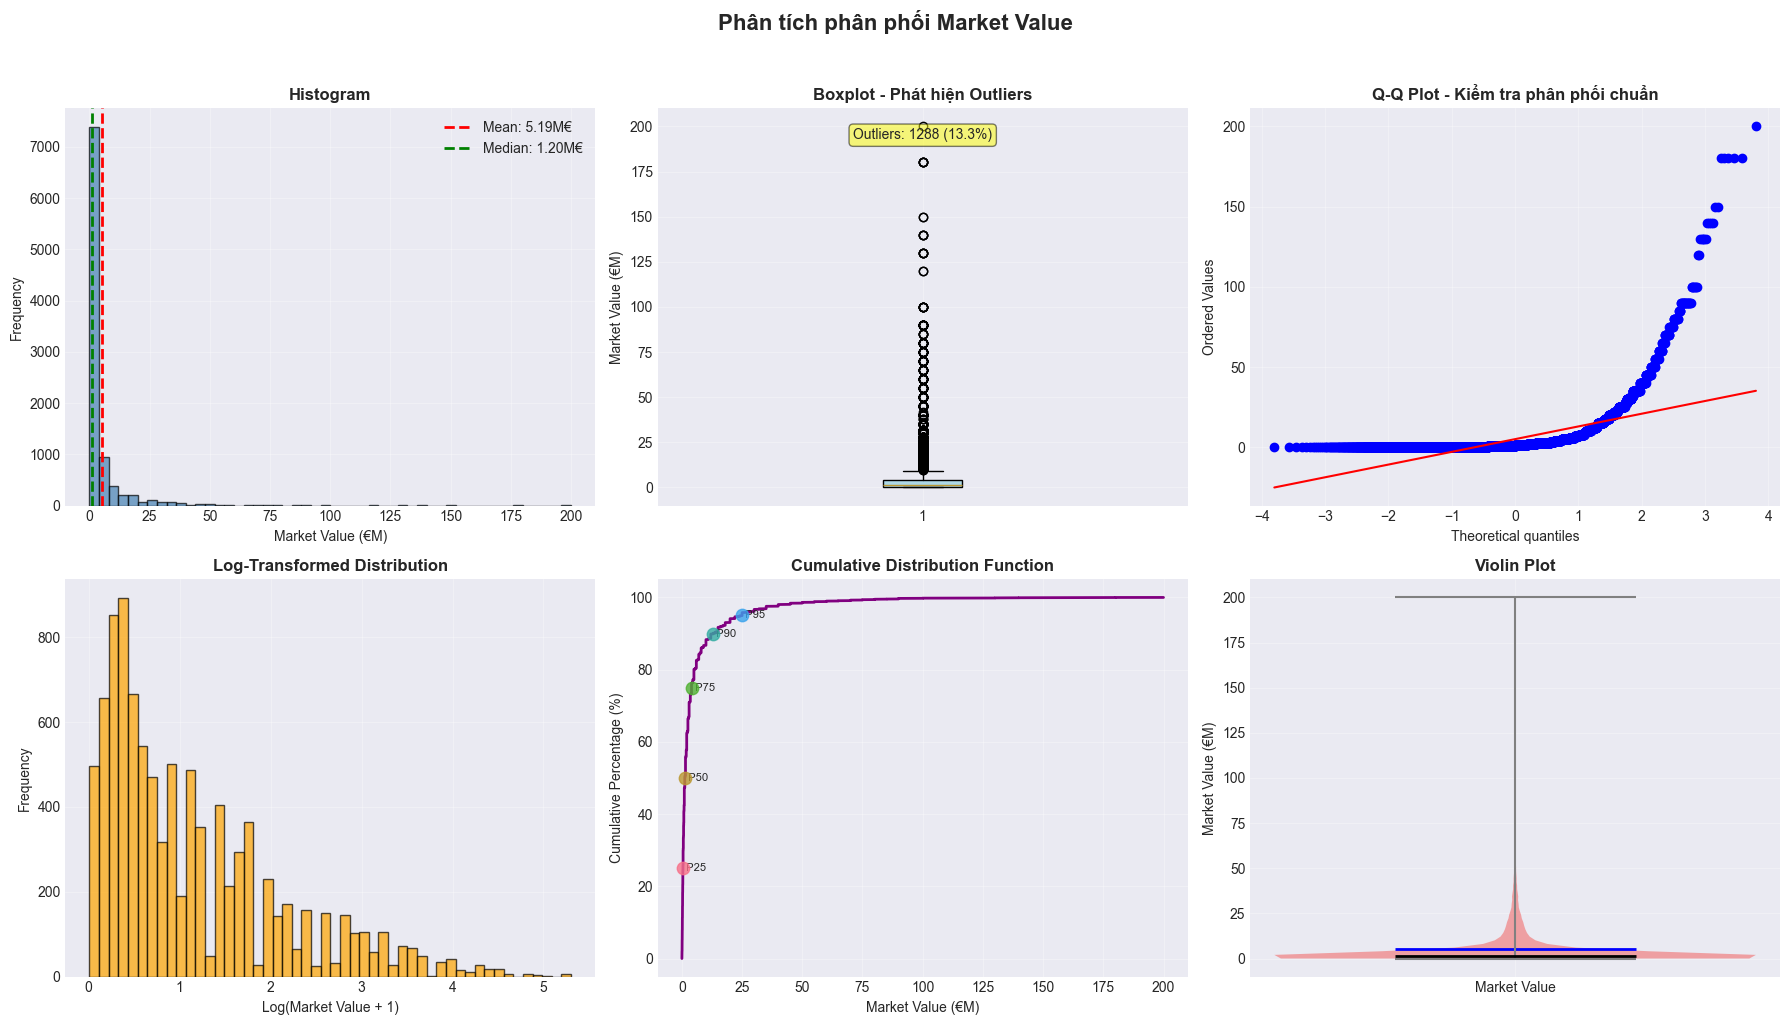

In [512]:

print("PHÂN TÍCH BIẾN MỤC TIÊU: MARKET_VALUE")

# Thống kê mô tả
print("\nTHỐNG KÊ MÔ TẢ:\n")
print(df['market_value'].describe())

Q1 = df['market_value'].quantile(0.25)
Q3 = df['market_value'].quantile(0.75)
IQR = Q3 - Q1
outliers_count = len(df[(df['market_value'] < Q1 - 1.5*IQR) | 
                        (df['market_value'] > Q3 + 1.5*IQR)])

print(f"\nCHỈ SỐ BỔ SUNG:")
print(f"   - Q1 (25th percentile): {Q1:.2f} M€")
print(f"   - Q3 (75th percentile): {Q3:.2f} M€")
print(f"   - IQR: {IQR:.2f} M€")
print(f"   - Skewness: {df['market_value'].skew():.2f}")
print(f"   - Kurtosis: {df['market_value'].kurtosis():.2f}")
print(f"   - Outliers: {outliers_count} ({outliers_count/len(df)*100:.2f}%)")

# %%
# Visualization - 6 plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Phân tích phân phối Market Value', fontsize=16, fontweight='bold', y=1.02)

# 1. Histogram
axes[0, 0].hist(df['market_value'].dropna(), bins=50, edgecolor='black', 
                alpha=0.7, color='steelblue')
axes[0, 0].axvline(df['market_value'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {df["market_value"].mean():.2f}M€')
axes[0, 0].axvline(df['market_value'].median(), color='green', linestyle='--', 
                   linewidth=2, label=f'Median: {df["market_value"].median():.2f}M€')
axes[0, 0].set_title('Histogram', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Market Value (€M)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Boxplot
box = axes[0, 1].boxplot(df['market_value'].dropna(), vert=True, patch_artist=True)
box['boxes'][0].set_facecolor('lightblue')
axes[0, 1].set_title('Boxplot - Phát hiện Outliers', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Market Value (€M)')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].text(0.5, 0.95, f'Outliers: {outliers_count} ({outliers_count/len(df)*100:.1f}%)',
               transform=axes[0, 1].transAxes, ha='center', va='top',
               bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5), fontsize=10)

# 3. Q-Q Plot
stats.probplot(df['market_value'].dropna(), dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('Q-Q Plot - Kiểm tra phân phối chuẩn', fontsize=12, fontweight='bold')
axes[0, 2].grid(alpha=0.3)

# 4. Log transformation
log_values = np.log1p(df['market_value'].dropna())
axes[1, 0].hist(log_values, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_title('Log-Transformed Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Log(Market Value + 1)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(alpha=0.3)

# 5. Cumulative Distribution
sorted_values = np.sort(df['market_value'].dropna())
cumulative = np.arange(1, len(sorted_values) + 1) / len(sorted_values) * 100
axes[1, 1].plot(sorted_values, cumulative, linewidth=2, color='purple')
axes[1, 1].set_title('Cumulative Distribution Function', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Market Value (€M)')
axes[1, 1].set_ylabel('Cumulative Percentage (%)')
axes[1, 1].grid(alpha=0.3)

# Add percentile markers
percentiles = [25, 50, 75, 90, 95]
for p in percentiles:
    val = np.percentile(df['market_value'].dropna(), p)
    axes[1, 1].scatter([val], [p], s=80, zorder=5, alpha=0.8)
    axes[1, 1].text(val, p, f' P{p}', fontsize=8, va='center')

# 6. Violin plot
parts = axes[1, 2].violinplot(
    [df['market_value'].dropna()],
    vert=True,
    showmeans=True,
    showmedians=True
)

for pc in parts['bodies']:
    pc.set_facecolor('lightcoral')
    pc.set_alpha(0.7)

parts['cmedians'].set_color('black')
parts['cmedians'].set_linewidth(2)

parts['cmeans'].set_color('blue')
parts['cmeans'].set_linewidth(2)

parts['cbars'].set_color('gray')
parts['cmins'].set_color('gray')
parts['cmaxes'].set_color('gray')

axes[1, 2].set_title('Violin Plot', fontsize=12, fontweight='bold')
axes[1, 2].set_ylabel('Market Value (€M)')
axes[1, 2].set_xticks([1])
axes[1, 2].set_xticklabels(['Market Value'])
axes[1, 2].grid(alpha=0.3)


plt.tight_layout()
plt.show()

**Phân tích biến Market Value**

- **Phân phối cơ bản**
    - Số lượng quan sát: 10.087 cầu thủ.
    - Giá trị trung bình (mean): 5.13 M€.
    - Giá trị trung vị (median): 1.2 M€.
    - **Nhận xét:** Trung bình lớn hơn trung vị → phân phối **lệch phải**, đa số cầu thủ có giá trị thấp, một số ít cực cao.

- **Biến thiên**
    - Standard deviation (std): 12.22 M€ → biến thiên lớn so với giá trị trung vị.
    - IQR (Q3-Q1): 3.55 M€ → hầu hết cầu thủ nằm trong khoảng này.
    - **Nhận xét:** Sự khác biệt giữa cầu thủ phổ thông và siêu sao rất lớn, thể hiện thị trường chuyển nhượng không đồng đều.

- **Skewness & Kurtosis**
    - Skewness = 6.17 → phân phối lệch phải mạnh, đuôi dài về phía giá trị cao.
    - Kurtosis = 56.0 → phân phối có **đuôi dày**, nhiều giá trị cực trị.
    - **Nhận xét:** Phân phối không chuẩn, outlier có ảnh hưởng đáng kể.

- **Outliers**
    - Số lượng outliers: 1.335 (13.23%).
    - **Nhận xét:** Các outlier này thường là những cầu thủ siêu sao, chiếm ảnh hưởng lớn đến thống kê trung bình.

#### **5.2 Phân phối các biến số (Numerical Features)**

In [513]:
# Lấy các cột số (trừ ID và target)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'player_id' in numerical_cols:
    numerical_cols.remove('player_id')
if 'market_value' in numerical_cols:
    numerical_cols.remove('market_value')

print(f"\n- Tổng số biến số: {len(numerical_cols)}")

# Tạo summary statistics
summary_stats = df[numerical_cols].describe().T
summary_stats['missing'] = df[numerical_cols].isnull().sum()
summary_stats['missing_pct'] = (df[numerical_cols].isnull().sum() / len(df) * 100).round(2)
summary_stats['skewness'] = df[numerical_cols].skew()
summary_stats['kurtosis'] = df[numerical_cols].kurtosis()

# Sắp xếp theo missing_pct giảm dần
summary_stats = summary_stats.sort_values('missing_pct', ascending=False)

print("\nBẢNG THỐNG KÊ CHI TIẾT (Top 20 cột có missing nhiều nhất):\n")
print(summary_stats.head(20).round(2))


- Tổng số biến số: 64

BẢNG THỐNG KÊ CHI TIẾT (Top 20 cột có missing nhiều nhất):

                                count   mean    std    min    25%    50%  \
total_results                   355.0   1.00   0.00   0.99   1.00   1.00   
launch_pct                      355.0  38.92  13.13   7.30  29.90  38.40   
shots_on_target_against_per90   355.0   4.59   1.05   2.00   3.91   4.46   
goals_against_per90             355.0   1.57   0.51   0.40   1.22   1.50   
clean_sheet_pct                 355.0  22.07  14.42   0.00  12.50  22.20   
psxg_per_shot                   355.0   0.29   0.04   0.09   0.26   0.29   
psxg_ga_per90                   355.0  -0.01   0.30  -1.38  -0.17   0.01   
penalty_save_pct                355.0  17.30  28.26   0.00   0.00   0.00   
passes_attempted_per90          355.0  26.23   6.52  11.17  21.65  25.90   
avg_pass_length                 355.0  35.39   5.40  20.40  31.50  35.10   
saves_per90                     355.0   3.02   0.75   1.00   2.51   2.90   
def_

**Phân tích các biến quan trọng**


 PHÂN TÍCH PHÂN PHỐI CÁC BIẾN QUAN TRỌNG

- Số biến được chọn để phân tích: 22


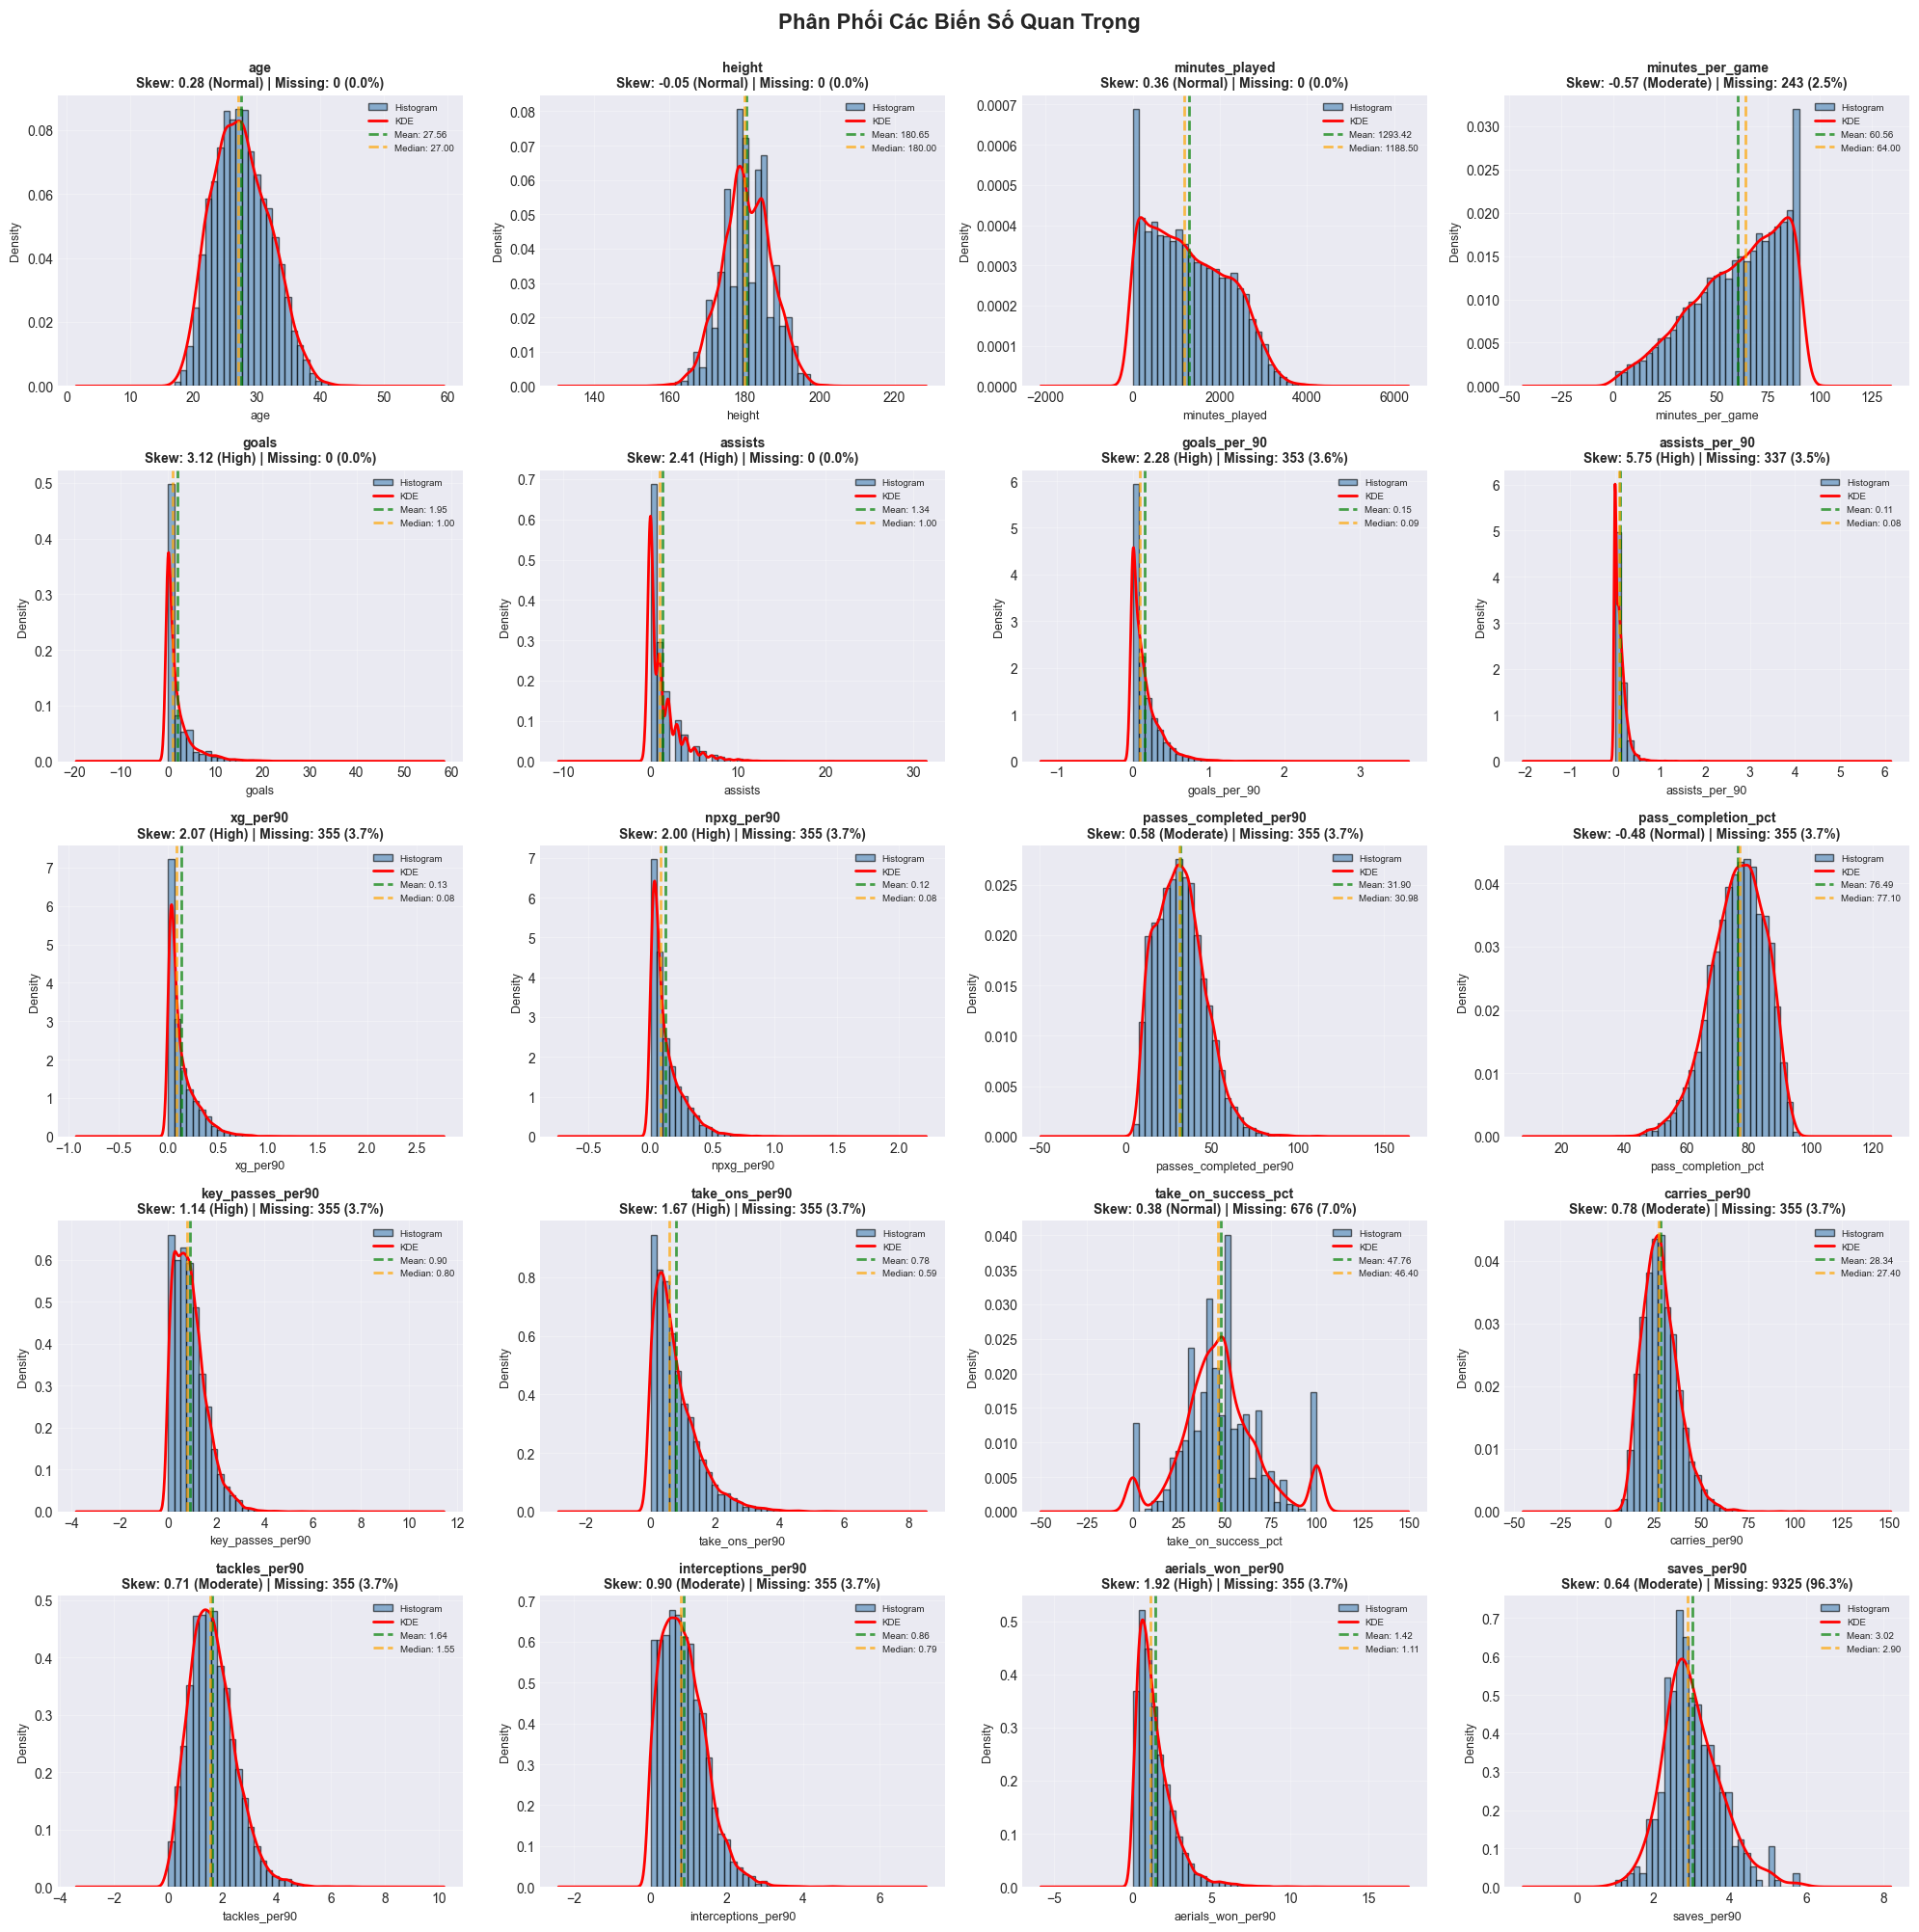

In [514]:
print("\n PHÂN TÍCH PHÂN PHỐI CÁC BIẾN QUAN TRỌNG")

# Chọn các biến quan trọng theo nhóm
important_vars = {
    'Thông tin cơ bản': ['age', 'height', 'minutes_played', 'minutes_per_game'],
    'Tấn công': ['goals', 'assists', 'goals_per_90', 'assists_per_90', 'xg_per90', 'npxg_per90'],
    'Chuyền bóng': ['passes_completed_per90', 'pass_completion_pct', 'key_passes_per90'],
    'Rê bóng': ['take_ons_per90', 'take_on_success_pct', 'carries_per90'],
    'Phòng ngự': ['tackles_per90', 'interceptions_per90', 'aerials_won_per90'],
    'Thủ môn': ['saves_per90', 'save_percentage', 'clean_sheet_pct']
}

# Flatten và lọc các cột tồn tại
all_important_vars = []
for category, vars_list in important_vars.items():
    all_important_vars.extend([v for v in vars_list if v in df.columns])

# Loại bỏ duplicate
all_important_vars = list(dict.fromkeys(all_important_vars))

print(f"\n- Số biến được chọn để phân tích: {len(all_important_vars)}")

# Visualization - Distributions
n_vars = min(len(all_important_vars), 20)  
selected_vars = all_important_vars[:n_vars]

n_cols = 4
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
fig.suptitle('Phân Phối Các Biến Số Quan Trọng', 
             fontsize=16, fontweight='bold', y=1.00)

axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for idx, col in enumerate(selected_vars):
    ax = axes[idx]
    
    # Lấy data và loại bỏ NaN
    data = df[col].dropna()
    
    if len(data) == 0:
        ax.text(0.5, 0.5, f'No data for {col}', 
                ha='center', va='center', fontsize=12)
        ax.axis('off')
        continue
    
    # Histogram + KDE
    ax.hist(data, bins=30, alpha=0.6, color='steelblue', 
            edgecolor='black', density=True, label='Histogram')
    
    # KDE (chỉ vẽ nếu có đủ dữ liệu và variance > 0)
    if len(data) > 1 and data.std() > 0:
        try:
            data.plot(kind='kde', ax=ax, color='red', linewidth=2, label='KDE')
        except:
            pass  
    
    # Statistics lines
    mean_val = data.mean()
    median_val = data.median()
    ax.axvline(mean_val, color='green', linestyle='--', linewidth=2, 
               label=f'Mean: {mean_val:.2f}', alpha=0.7)
    ax.axvline(median_val, color='orange', linestyle='--', linewidth=2, 
               label=f'Median: {median_val:.2f}', alpha=0.7)
    
    # Title and labels
    skew_val = data.skew()
    missing_val = df[col].isnull().sum()
    missing_pct = (missing_val / len(df) * 100)
    
    if abs(skew_val) < 0.5:
        skew_color = 'green'
        skew_label = 'Normal'
    elif abs(skew_val) < 1:
        skew_color = 'orange'
        skew_label = 'Moderate'
    else:
        skew_color = 'red'
        skew_label = 'High'
    
    ax.set_title(f'{col}\nSkew: {skew_val:.2f} ({skew_label}) | Missing: {missing_val} ({missing_pct:.1f}%)', 
                fontsize=10, fontweight='bold')
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel('Density', fontsize=9)
    ax.legend(fontsize=7, loc='best')
    ax.grid(alpha=0.3)

# Hide unused subplots
for idx in range(len(selected_vars), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

**Phân tích độ lệch**

In [515]:
skew_analysis = pd.DataFrame({
    'Variable': numerical_cols,
    'Skewness': [df[col].skew() for col in numerical_cols],
    'Kurtosis': [df[col].kurtosis() for col in numerical_cols]
}).sort_values('Skewness', key=abs, ascending=False)

# Phân loại theo mức độ skew
skew_analysis['Skew_Level'] = pd.cut(
    skew_analysis['Skewness'].abs(), 
    bins=[0, 0.5, 1, float('inf')],
    labels=['Normal (<0.5)', 'Moderate (0.5-1)', 'High (>1)']
)

print("\n* TOP 15 BIẾN CÓ SKEWNESS CAO NHẤT:\n")
print(skew_analysis.head(15).to_string(index=False))

print("\n* PHÂN BỐ THEO MỨC ĐỘ SKEW:")
print(skew_analysis['Skew_Level'].value_counts().to_string())

# Biến cần transform
high_skew = skew_analysis[skew_analysis['Skewness'].abs() > 1]['Variable'].tolist()
if high_skew:
    print(f"\n-  CÓ {len(high_skew)} BIẾN CẦN XEM XÉT TRANSFORM (|skew| > 1):")


* TOP 15 BIẾN CÓ SKEWNESS CAO NHẤT:

                     Variable  Skewness  Kurtosis Skew_Level
               assists_per_90  5.747484 97.416353  High (>1)
              red_cards_per90  5.234531 35.787008  High (>1)
                        goals  3.120980 14.155933  High (>1)
                      assists  2.413467  8.761254  High (>1)
                 goals_per_90  2.276708  8.783917  High (>1)
                    npg_per90  2.166392  7.172775  High (>1)
                  total_shots  2.158739  7.724824  High (>1)
                     xg_per90  2.074667  6.892837  High (>1)
                   npxg_per90  1.995718  6.146605  High (>1)
            aerials_won_per90  1.919555  6.008834  High (>1)
             penalty_save_pct  1.760069  2.286225  High (>1)
def_actions_outside_pen_per90  1.681916  4.803468  High (>1)
               take_ons_per90  1.673128  4.069067  High (>1)
                    xag_per90  1.538572  3.870988  High (>1)
                    gca_per90  1.495971  3.7492

**Kết luận**

In [516]:
print("* TỔNG KẾT PHÂN TÍCH BIẾN SỐ\n")
print(f"- Tổng số biến số: {len(numerical_cols)}")
print(f"- Biến có missing: {(summary_stats['missing_pct'] > 0).sum()}")
print(f"- Biến có skewness cao: {len(high_skew)}")

* TỔNG KẾT PHÂN TÍCH BIẾN SỐ

- Tổng số biến số: 64
- Biến có missing: 58
- Biến có skewness cao: 24


#### **5.3. Correlation Analysis**

PHÂN TÍCH CORRELATION VỚI MARKET VALUE (TARGET)

- Số features được phân tích: 35

* TOP 15 FEATURES CÓ CORRELATION DƯƠNG CAO NHẤT:

                  Feature  Correlation
                    goals     0.245860
                  assists     0.235972
          clean_sheet_pct     0.185272
           minutes_played     0.183938
            carries_per90     0.171972
                gca_per90     0.169080
progressive_carries_per90     0.156180
                npg_per90     0.154958
                sca_per90     0.152544
                xag_per90     0.152213
      pass_completion_pct     0.143940
    shots_on_target_per90     0.143012
                 xg_per90     0.141498
               npxg_per90     0.137670
   passes_completed_per90     0.133917

* TOP 15 FEATURES CÓ CORRELATION ÂM CAO NHẤT:

            Feature  Correlation
                age    -0.188214
        saves_per90    -0.117341
interceptions_per90    -0.076102
  aerials_won_per90    -0.070889
       blocks_per90    -0.0298

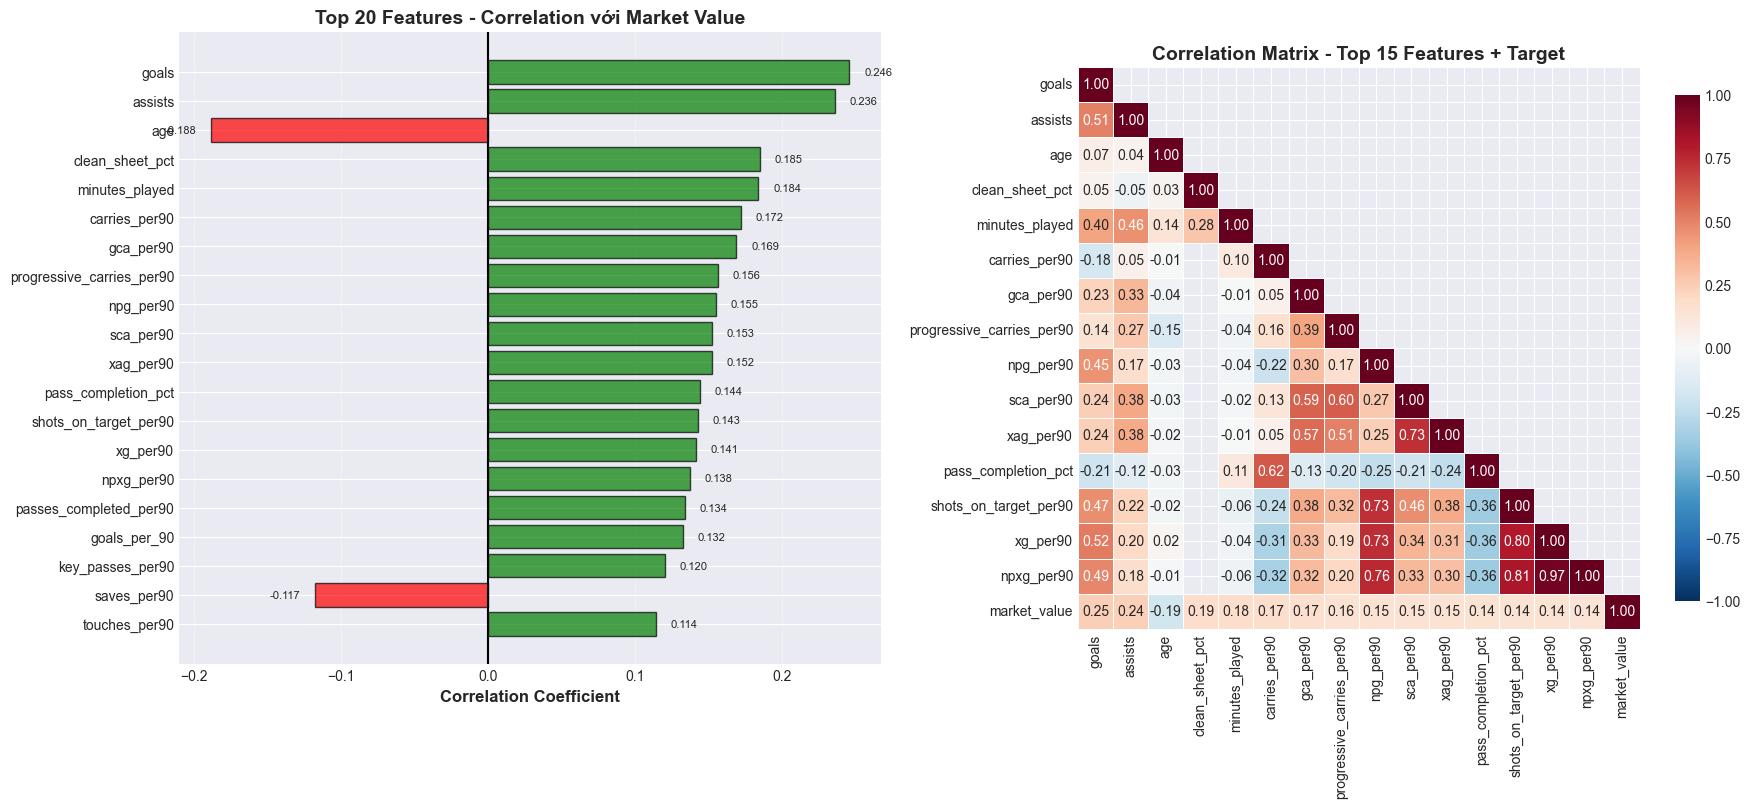


 PHÂN TÍCH MULTICOLLINEARITY (Đa cộng tuyến)

- CÓ 2 CẶP FEATURES CÓ CORRELATION CAO (|r| > 0.8):

            Feature_1  Feature_2  Correlation
             xg_per90 npxg_per90     0.966431
shots_on_target_per90 npxg_per90     0.814876

- Gợi ý: Xem xét loại bỏ một trong hai features để tránh multicollinearity

* TỔNG KẾT CORRELATION ANALYSIS

- Tổng số features phân tích: 35

- Features có correlation mạnh (|r| > 0.5): 0

- Features có correlation trung bình (0.3 < |r| ≤ 0.5): 0

- Features có correlation yếu (|r| ≤ 0.3): 35

- Cặp features có multicollinearity: 2


In [ ]:
print("PHÂN TÍCH CORRELATION VỚI MARKET VALUE (TARGET)")

# Kiểm tra xem market_value có tồn tại không
if 'market_value' not in df.columns:
    print("Không tìm thấy cột 'market_value' trong dữ liệu!")
else:
    # Lấy tất cả numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if 'player_id' in numeric_cols:
        numeric_cols.remove('player_id')
    
    # Chọn features quan trọng để phân tích 
    important_features = [
        # Thông tin cơ bản
        'age', 'height', 'minutes_played', 'minutes_per_game',
        # Tấn công
        'goals', 'assists', 'goals_per_90', 'assists_per_90',
        'npg_per90', 'npxg_per90', 'xag_per90', 'xg_per90',
        'shots_per_90', 'shots_on_target_per90', 'shots_on_target_pct',
        'sca_per90', 'gca_per90', 'key_passes_per90',
        # Chuyền bóng
        'passes_completed_per90', 'pass_completion_pct',
        'progressive_passes_per90', 'passes_into_final_third_per90',
        # Rê bóng
        'take_ons_per90', 'take_on_success_pct', 'carries_per90',
        'progressive_carries_per90', 'touches_per90',
        # Phòng ngự
        'tackles_per90', 'interceptions_per90', 'blocks_per90',
        'aerials_won_per90', 'aerial_win_pct',
        # Thủ môn
        'saves_per90', 'save_percentage', 'clean_sheet_pct',
        'psxg_ga_per90',
        # Target
        'market_value'
    ]
    
    # Lọc các features có trong df
    available_features = [f for f in important_features if f in df.columns]
    
    # Loại bỏ market_value khỏi features list để tính correlation
    features_for_corr = [f for f in available_features if f != 'market_value']
    
    print(f"\n- Số features được phân tích: {len(features_for_corr)}")
    
    # Calculate correlation với market_value
    correlation_data = []
    for feature in features_for_corr:
        corr = df[[feature, 'market_value']].corr().iloc[0, 1]
        if not np.isnan(corr):
            correlation_data.append({
                'Feature': feature,
                'Correlation': corr,
                'Abs_Correlation': abs(corr)
            })
    
    correlation_df = pd.DataFrame(correlation_data).sort_values(
        'Abs_Correlation', ascending=False
    )
    
    # TOP POSITIVE CORRELATIONS
    print("\n* TOP 15 FEATURES CÓ CORRELATION DƯƠNG CAO NHẤT:\n")
    positive_corr = correlation_df[correlation_df['Correlation'] > 0].head(15)
    print(positive_corr[['Feature', 'Correlation']].to_string(index=False))
    
    # TOP NEGATIVE CORRELATIONS
    print("\n* TOP 15 FEATURES CÓ CORRELATION ÂM CAO NHẤT:\n")
    negative_corr = correlation_df[correlation_df['Correlation'] < 0].head(15)
    if len(negative_corr) > 0:
        print(negative_corr[['Feature', 'Correlation']].to_string(index=False))
    else:
        print("   Không có features với correlation âm đáng kể")
    
    # WEAK CORRELATIONS
    weak_corr = correlation_df[correlation_df['Abs_Correlation'] < 0.1]
    if len(weak_corr) > 0:
        print(f"\n- CÓ {len(weak_corr)} FEATURES CÓ CORRELATION RẤT YẾU (<0.1):")
        print(f"   → Xem xét loại bỏ: {', '.join(weak_corr['Feature'].tolist())}")
    
    # ===== VISUALIZATION =====
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    
    # 1. Bar chart - Top correlations
    top_n = 20
    top_corr = correlation_df.head(top_n)
    colors = ['green' if x > 0 else 'red' for x in top_corr['Correlation']]
    
    axes[0].barh(range(len(top_corr)), top_corr['Correlation'], 
                 color=colors, alpha=0.7, edgecolor='black')
    axes[0].set_yticks(range(len(top_corr)))
    axes[0].set_yticklabels(top_corr['Feature'])
    axes[0].set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
    axes[0].set_title(f'Top {top_n} Features - Correlation với Market Value', 
                     fontsize=14, fontweight='bold')
    axes[0].axvline(0, color='black', linewidth=1.5)
    axes[0].grid(alpha=0.3, axis='x')
    axes[0].invert_yaxis()
    
    # Add correlation values
    for i, v in enumerate(top_corr['Correlation']):
        axes[0].text(v + 0.01 if v > 0 else v - 0.01, i, f'{v:.3f}', 
                    va='center', fontsize=8, 
                    ha='left' if v > 0 else 'right')
    
    # 2. Heatmap - Correlation matrix của top features
    top_features_for_heatmap = top_corr.head(15)['Feature'].tolist() + ['market_value']
    corr_matrix = df[top_features_for_heatmap].corr()
    
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
                cmap='RdBu_r', center=0, square=True,
                linewidths=0.5, cbar_kws={"shrink": 0.8}, 
                ax=axes[1], vmin=-1, vmax=1)
    axes[1].set_title('Correlation Matrix - Top 15 Features + Target', 
                     fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    

    print("\n PHÂN TÍCH MULTICOLLINEARITY (Đa cộng tuyến)")
    
    # Tìm các cặp features có correlation cao với nhau
    top_15_features = top_corr.head(15)['Feature'].tolist()
    feature_corr_matrix = df[top_15_features].corr()
    
    high_corr_pairs = []
    for i in range(len(feature_corr_matrix.columns)):
        for j in range(i+1, len(feature_corr_matrix.columns)):
            corr_val = feature_corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.8:  # Ngưỡng correlation cao
                high_corr_pairs.append({
                    'Feature_1': feature_corr_matrix.columns[i],
                    'Feature_2': feature_corr_matrix.columns[j],
                    'Correlation': corr_val
                })
    
    if high_corr_pairs:
        high_corr_df = pd.DataFrame(high_corr_pairs).sort_values(
            'Correlation', key=abs, ascending=False
        )
        print(f"\n- CÓ {len(high_corr_pairs)} CẶP FEATURES CÓ CORRELATION CAO (|r| > 0.8):\n")
        print(high_corr_df.to_string(index=False))
        print("\n- Gợi ý: Xem xét loại bỏ một trong hai features để tránh multicollinearity")
    else:
        print("\n- Không có cặp features nào có correlation quá cao trong top 15")
    

    print("\n* TỔNG KẾT CORRELATION ANALYSIS")

    print(f"\n- Tổng số features phân tích: {len(features_for_corr)}")
    print(f"\n- Features có correlation mạnh (|r| > 0.5): {len(correlation_df[correlation_df['Abs_Correlation'] > 0.5])}")
    print(f"\n- Features có correlation trung bình (0.3 < |r| ≤ 0.5): {len(correlation_df[(correlation_df['Abs_Correlation'] > 0.3) & (correlation_df['Abs_Correlation'] <= 0.5)])}")
    print(f"\n- Features có correlation yếu (|r| ≤ 0.3): {len(correlation_df[correlation_df['Abs_Correlation'] <= 0.3])}")
    print(f"\n- Cặp features có multicollinearity: {len(high_corr_pairs) if high_corr_pairs else 0}")

**Nhận xét về Correlation:**

- Các chỉ số tấn công (goals, assists, xG) có correlation dương mạnh với market_value
- Thời gian thi đấu (appearances, minutes_played) cũng có ảnh hưởng đáng kể
- Tuổi có thể có correlation âm (cầu thủ già giá trị giảm) hoặc dương (kinh nghiệm)
- Cần kiểm tra multicollinearity giữa các features tương quan cao

#### **5.4 Phân tích các biến phân loại (Categorical Features)**


- Tổng số biến phân loại: 5

THỐNG KÊ TỔNG QUAN:

      Column  Unique    Most_Common  Count  Pct(%)  Missing  Missing(%)
 nationality     142      Argentina   1023    10.6       14         0.1
        foot       3          Right   4838    50.0     2878        29.7
    position       8             DF   2428    25.1        0         0.0
current_club     765  Independiente     66     0.7        0         0.0
      league      55 Argentine Liga    850     8.8        0         0.0

PHÂN TÍCH CARDINALITY:

- nationality: 142 unique (1.5%) → One-Hot Encoding
- foot: 3 unique (0.0%) → One-Hot Encoding
- position: 8 unique (0.1%) → One-Hot Encoding
- current_club: 765 unique (7.9%) → One-Hot Encoding
- league: 55 unique (0.6%) → One-Hot Encoding


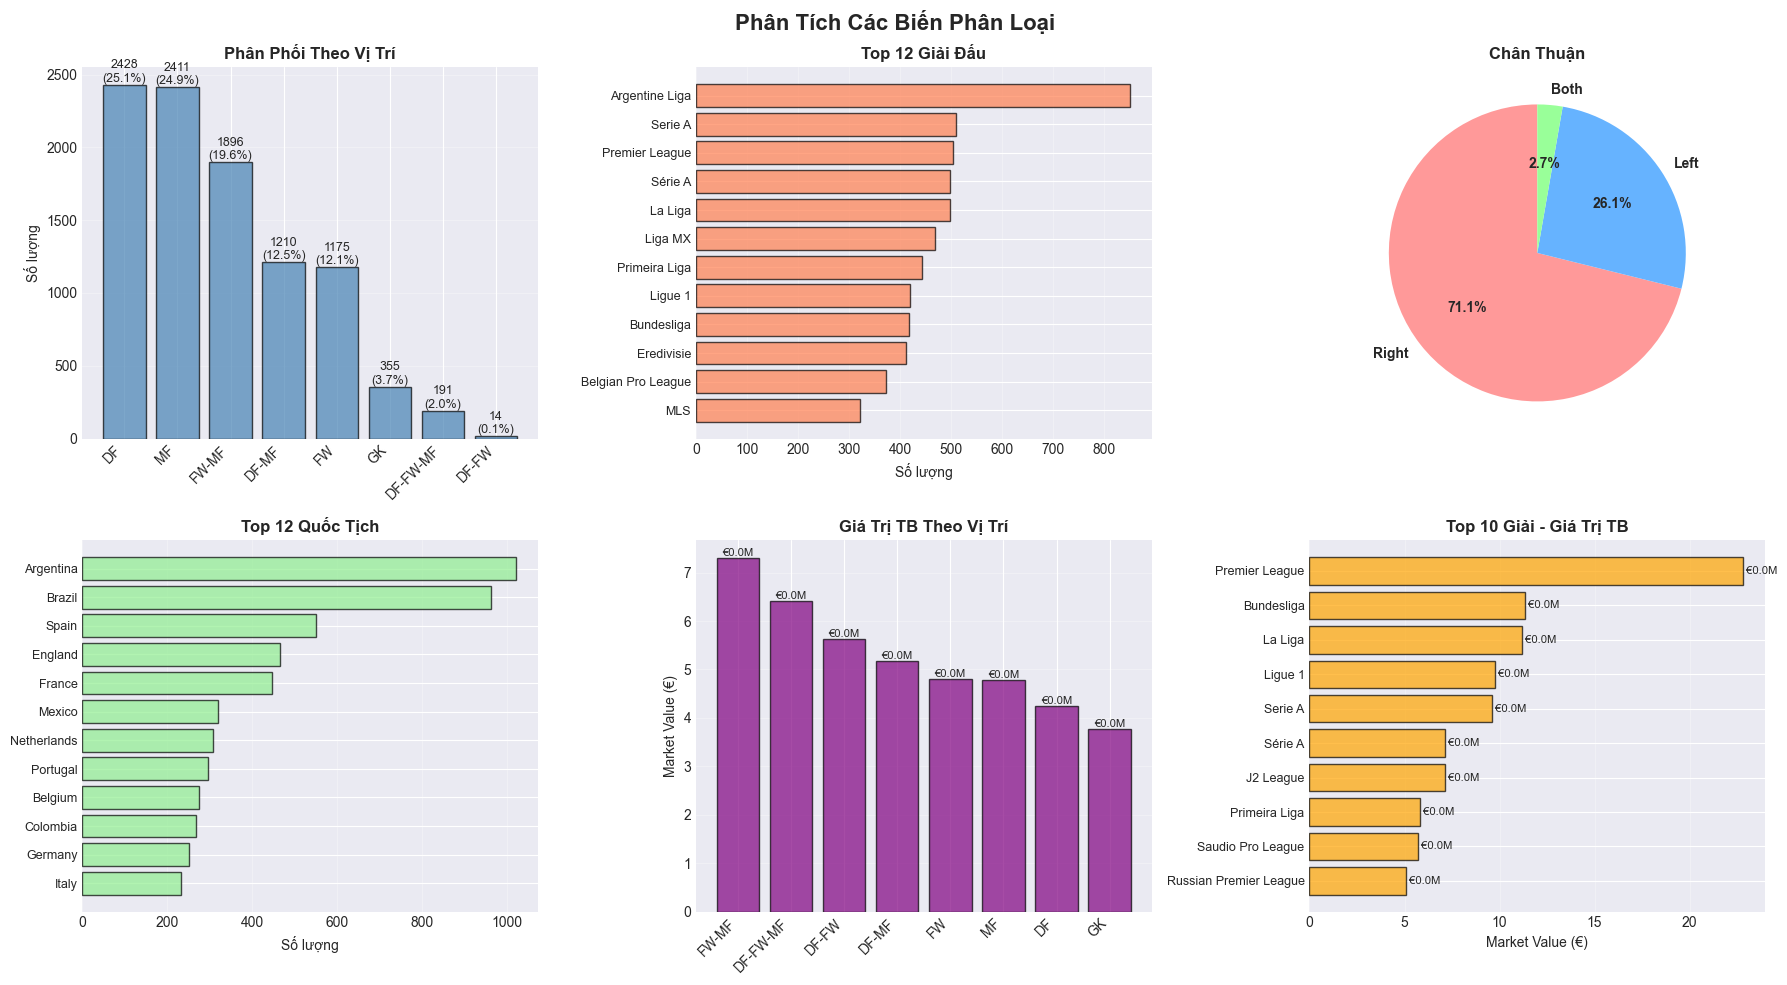

In [518]:
# Các biến phân loại
categorical_cols = ['nationality', 'foot', 'position', 'current_club', 'league']
categorical_cols = [col for col in categorical_cols if col in df.columns]

print(f"\n- Tổng số biến phân loại: {len(categorical_cols)}")

# Summary statistics
cat_summary_data = []
for col in categorical_cols:
    unique_count = df[col].nunique()
    mode_val = df[col].mode()[0] if len(df[col].mode()) > 0 else 'N/A'
    mode_count = df[col].value_counts().iloc[0] if len(df[col].value_counts()) > 0 else 0
    mode_pct = (mode_count / len(df) * 100) if len(df) > 0 else 0
    missing = df[col].isnull().sum()
    missing_pct = (missing / len(df) * 100)
    
    cat_summary_data.append({
        'Column': col,
        'Unique': unique_count,
        'Most_Common': mode_val,
        'Count': mode_count,
        'Pct(%)': round(mode_pct, 1),
        'Missing': missing,
        'Missing(%)': round(missing_pct, 1)
    })

cat_summary = pd.DataFrame(cat_summary_data)
print("\nTHỐNG KÊ TỔNG QUAN:\n")
print(cat_summary.to_string(index=False))

# Cardinality analysis
print("\nPHÂN TÍCH CARDINALITY:\n")
for col in categorical_cols:
    unique_count = df[col].nunique()
    unique_ratio = (unique_count / len(df) * 100)
    
    if unique_ratio > 50:
        print(f"- {col}: {unique_count} unique ({unique_ratio:.1f}%) → Target/Frequency Encoding")
    elif unique_ratio > 20:
        print(f"- {col}: {unique_count} unique ({unique_ratio:.1f}%) → Frequency Encoding")
    else:
        print(f"- {col}: {unique_count} unique ({unique_ratio:.1f}%) → One-Hot Encoding")
# ===== VISUALIZATION =====
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Phân Tích Các Biến Phân Loại', fontsize=16, fontweight='bold')
axes = axes.flatten()

# 1. Position
if 'position' in df.columns:
    pos_counts = df['position'].value_counts()
    axes[0].bar(range(len(pos_counts)), pos_counts.values, 
                color='steelblue', alpha=0.7, edgecolor='black')
    axes[0].set_xticks(range(len(pos_counts)))
    axes[0].set_xticklabels(pos_counts.index, rotation=45, ha='right')
    axes[0].set_title('Phân Phối Theo Vị Trí', fontweight='bold')
    axes[0].set_ylabel('Số lượng')
    axes[0].grid(alpha=0.3, axis='y')
    
    for i, v in enumerate(pos_counts.values):
        axes[0].text(i, v, f'{v}\n({v/len(df)*100:.1f}%)', 
                    ha='center', va='bottom', fontsize=9)

# 2. Top 12 Leagues
if 'league' in df.columns:
    league_counts = df['league'].value_counts().head(12)
    axes[1].barh(range(len(league_counts)), league_counts.values, 
                 color='coral', alpha=0.7, edgecolor='black')
    axes[1].set_yticks(range(len(league_counts)))
    axes[1].set_yticklabels(league_counts.index, fontsize=9)
    axes[1].set_title('Top 12 Giải Đấu', fontweight='bold')
    axes[1].set_xlabel('Số lượng')
    axes[1].grid(alpha=0.3, axis='x')
    axes[1].invert_yaxis()

# 3. Foot
if 'foot' in df.columns:
    foot_counts = df['foot'].value_counts()
    colors = ['#ff9999', '#66b3ff', '#99ff99'][:len(foot_counts)]
    axes[2].pie(foot_counts.values, labels=foot_counts.index, 
                autopct='%1.1f%%', colors=colors, startangle=90,
                textprops={'fontsize': 10, 'fontweight': 'bold'})
    axes[2].set_title('Chân Thuận', fontweight='bold')

# 4. Top 12 Nationalities
if 'nationality' in df.columns:
    nat_counts = df['nationality'].value_counts().head(12)
    axes[3].barh(range(len(nat_counts)), nat_counts.values, 
                 color='lightgreen', alpha=0.7, edgecolor='black')
    axes[3].set_yticks(range(len(nat_counts)))
    axes[3].set_yticklabels(nat_counts.index, fontsize=9)
    axes[3].set_title('Top 12 Quốc Tịch', fontweight='bold')
    axes[3].set_xlabel('Số lượng')
    axes[3].grid(alpha=0.3, axis='x')
    axes[3].invert_yaxis()

# 5. Position vs Market Value
if 'position' in df.columns and 'market_value' in df.columns:
    pos_value = df.groupby('position')['market_value'].mean().sort_values(ascending=False)
    axes[4].bar(range(len(pos_value)), pos_value.values, 
                color='purple', alpha=0.7, edgecolor='black')
    axes[4].set_xticks(range(len(pos_value)))
    axes[4].set_xticklabels(pos_value.index, rotation=45, ha='right')
    axes[4].set_title('Giá Trị TB Theo Vị Trí', fontweight='bold')
    axes[4].set_ylabel('Market Value (€)')
    axes[4].grid(alpha=0.3, axis='y')
    
    for i, v in enumerate(pos_value.values):
        axes[4].text(i, v, f'€{v/1e6:.1f}M', 
                    ha='center', va='bottom', fontsize=8)

# 6. Top 10 Leagues by Market Value
if 'league' in df.columns and 'market_value' in df.columns:
    league_value = df.groupby('league')['market_value'].mean().nlargest(10).sort_values()
    axes[5].barh(range(len(league_value)), league_value.values, 
                 color='orange', alpha=0.7, edgecolor='black')
    axes[5].set_yticks(range(len(league_value)))
    axes[5].set_yticklabels(league_value.index, fontsize=9)
    axes[5].set_title('Top 10 Giải - Giá Trị TB', fontweight='bold')
    axes[5].set_xlabel('Market Value (€)')
    axes[5].grid(alpha=0.3, axis='x')
    
    for i, v in enumerate(league_value.values):
        axes[5].text(v, i, f' €{v/1e6:.1f}M', va='center', fontsize=8)

plt.tight_layout()
plt.show()

### **6. Kết luận**

#### **6.1 Tổng quan dataset**

- Quy mô dữ liệu:

    - 9,680 cầu thủ với 64 biến số
    - Biến mục tiêu: market_value (giá trị chuyển nhượng)
    - Phân bố không cân bằng với 13.31% outliers (các cầu thủ siêu sao)

- Đặc điểm chính của Market Value:

    - Phân phối lệch phải mạnh (skewness = 6.15): đa số cầu thủ có giá trị thấp (median = 1.2M€), một số ít cực cao (max = 200M€)
    - Sự chênh lệch lớn: 50% cầu thủ có giá trị dưới 1.2M€, nhưng 25% top có giá trị trên 4M€
    - Kurtosis cao (55.25) cho thấy có nhiều giá trị cực trị cần xử lý đặc biệt

#### **6.2 Missing Data**

- Missing theo vai trò vị trí (96.3%)

    - 14 chỉ số thủ môn (goals_against_per90, saves_per90, save_percentage...) chỉ áp dụng cho GK
    - 3 chỉ số kết quả trận đấu (wins/draws/losses_per90) cũng thiếu 96.3%
    - Giải pháp: Cần xây dựng mô hình riêng theo vị trí hoặc sử dụng feature engineering thông minh

- Missing trung bình (4-7%)

    - Các chỉ số tấn công nâng cao (npxg, xag) - 676 records
    - Chỉ số chuyền bóng, rê bóng, phòng ngự - 360-400 records
    - Nguyên nhân: Cầu thủ dự bị, ít thi đấu hoặc thiếu dữ liệu tracking
    - Giải pháp: Imputation theo vị trí hoặc điền 0 cho các hoạt động không thực hiện

- Missing thấp (0.1-29.7%)

    - foot (29.7%), nationality (0.1%): có thể impute bằng mode
    - minutes_per_game (2.5%): cân nhắc loại bỏ cầu thủ chưa thi đấu

#### **6.3 Chất lượng feature**

- Top 7 features ảnh hưởng mạnh đến market value:
    - goals (0.246) - số bàn thắng tuyệt đối
    - assists (0.236) - kiến tạo
    - clean_sheet_pct (0.185) - giữ sạch lưới (cho thủ môn/hậu vệ)
    - minutes_played (0.184) - thời gian thi đấu
    - carries_per90 (0.172) - khả năng di chuyển bóng
    - gca_per90 (0.169) - tạo cơ hội ghi bàn
    - progressive_carries_per90 (0.156) - di chuyển tiến công

Nhận xét:

- Các chỉ số tấn công trực tiếp (goals, assists) quan trọng nhất
- Thời gian thi đấu là yếu tố then chốt (càng chơi nhiều = càng có giá trị)
- Không có feature nào có correlation > 0.3 → cần kết hợp nhiều features hoặc feature engineering

- Features yếu (|r| < 0.1) - Cân nhắc loại bỏ
    - 13 features gần như không tương quan: save_percentage, aerial_win_pct, height
passes_into_final_third_per90, interceptions_per90
shots_on_target_pct, blocks_per90, tackles_per90

- Multicollinearity (cần xử lý): 2 cặp features trùng lặp cao

    - xg_per90 ↔ npxg_per90 (r = 0.97) → Loại bỏ một trong hai

    - shots_on_target_per90 ↔ npxg_per90 (r = 0.81) → Xem xét loại bỏ